In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sc_experiments import *
import matplotlib.pyplot as plt 
import numpy as np

# Explore parts prediction

This noteboook explores simple unsupervised methods for battery part prediction. The goal is to identify battery parts, based on the supply chain network and the code for battery (850760).

In [3]:
sc = MultiTierSC()
G1 = sc.get_supply_chain([BATTERY], tiers=1, as_nx=True)
G2 = sc.get_supply_chain([BATTERY], tiers=2, as_nx=True)
G3 = sc.get_supply_chain([BATTERY], tiers=3, as_nx=True)

# get pagerank results
kwargs = {'personalization': {'%s_PRODUCT' % BATTERY: 1}}
pr_df1 = get_pagerank_ordering(G1, kwargs=kwargs)
pr_df2 = get_pagerank_ordering(G2, kwargs=kwargs)
pr_df3 = get_pagerank_ordering(G3, kwargs=kwargs)

# get PMI results
pmis = sc.compute_pmis(max_degree=3)
pmis[pmis.product_sold == BATTERY].head().round(4)

Found 4137 companies overall, 4137 companies with edges, 2720 products with edges, 50117 edges
Found 5658 companies overall, 5658 companies with edges, 2946 products with edges, 77113 edges
Found 7146 companies overall, 7146 companies with edges, 3135 products with edges, 96043 edges


,product_sold,product_bought,num_product_pair,p_product_pair,p_product_sold,p_product_bought,p_multiplied,pmi,pmi^2,pmi^3
415850,850760,003300,2,0.0001,0.1374,0.0006,0.0001,-0.1549,-9.7746,-19.3944
415851,850760,080450,1,0.0000,0.1374,0.0003,0.0000,-0.0943,-10.4072,-20.7200
415852,850760,081190,1,0.0000,0.1374,0.0000,0.0000,1.9852,-8.3277,-18.6406
415853,850760,090111,1,0.0000,0.1374,0.0003,0.0000,-0.0943,-10.4072,-20.7200
415854,850760,090121,2,0.0001,0.1374,0.0001,0.0000,1.2920,-8.3277,-17.9475


In [4]:
# should evaluate on standard set of products for fair comparison
# only consider products that are bought by battery maker
products = pmis[pmis.product_sold == BATTERY].product_bought.values
print('Keeping %d products' % len(products))
print('Found %d out of %d battery parts' % (np.sum(np.isin(BATTERY_PARTS, products)), len(BATTERY_PARTS)))
rand_ordering = products.copy()
np.random.seed(0)
np.random.shuffle(rand_ordering)
orderings = {'rand': rand_ordering}

Keeping 1726 products
Found 82 out of 85 battery parts


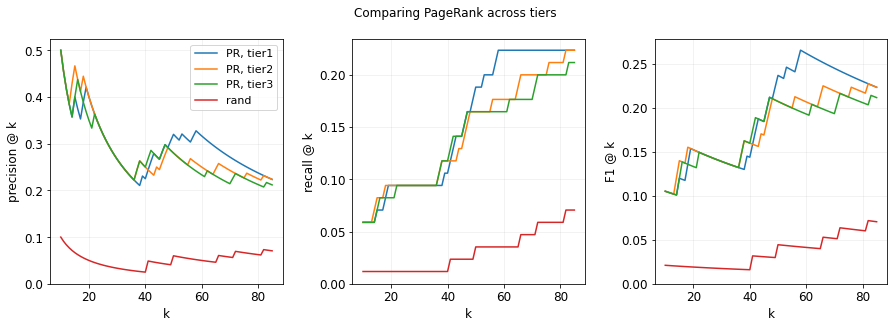

In [5]:
# compare results across PageRanks (undirected graph)
orderings['PR, tier1'] = pr_df1[(pr_df1.node_type == 'PRODUCT') & (pr_df1.node_name.isin(products))].node_name.values
orderings['PR, tier2'] = pr_df2[(pr_df2.node_type == 'PRODUCT') & (pr_df2.node_name.isin(products))].node_name.values
orderings['PR, tier3'] = pr_df3[(pr_df3.node_type == 'PRODUCT') & (pr_df3.node_name.isin(products))].node_name.values
labels = ['PR, tier1', 'PR, tier2', 'PR, tier3', 'rand']
compare_orderings_across_k(orderings, labels, title='Comparing PageRank across tiers')

Found 4137 companies overall, 4137 companies with edges, 2720 products with edges, 50117 edges
Found 4137 companies overall, 4137 companies with edges, 2720 products with edges, 50117 edges


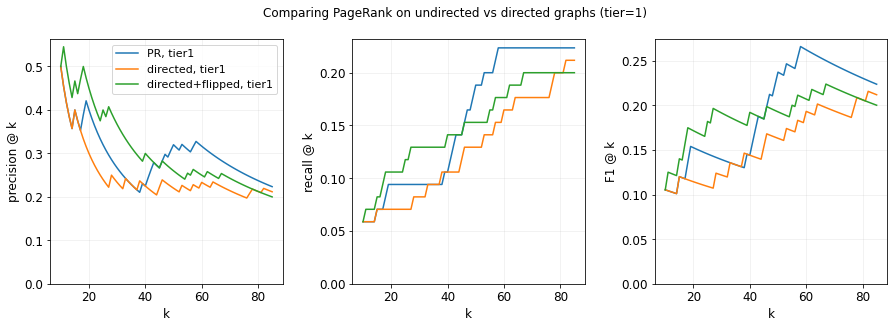

In [6]:
# try directed graph
num_tiers = 1
G_dir = sc.get_supply_chain([BATTERY], tiers=num_tiers, as_nx=True, nx_kwargs={'directed':True})
pr_df_dir = get_pagerank_ordering(G_dir, kwargs=kwargs)
orderings[f'directed, tier{num_tiers}'] = pr_df_dir[(pr_df_dir.node_type == 'PRODUCT') & (pr_df_dir.node_name.isin(products))].node_name.values

G_dir_flip = sc.get_supply_chain([BATTERY], tiers=num_tiers, as_nx=True, nx_kwargs={'directed':True, 'flip_direction':True})
pr_df_dir_flip = get_pagerank_ordering(G_dir_flip, kwargs=kwargs)
orderings[f'directed+flipped, tier{num_tiers}'] = pr_df_dir_flip[(pr_df_dir_flip.node_type == 'PRODUCT') & (pr_df_dir_flip.node_name.isin(products))].node_name.values

labels = [f'PR, tier{num_tiers}', f'directed, tier{num_tiers}', f'directed+flipped, tier{num_tiers}']
compare_orderings_across_k(orderings, labels, title=f'Comparing PageRank on undirected vs directed graphs (tier={num_tiers})')

Found 5658 companies overall, 5658 companies with edges, 2946 products with edges, 77113 edges
Found 5658 companies overall, 5658 companies with edges, 2946 products with edges, 77113 edges


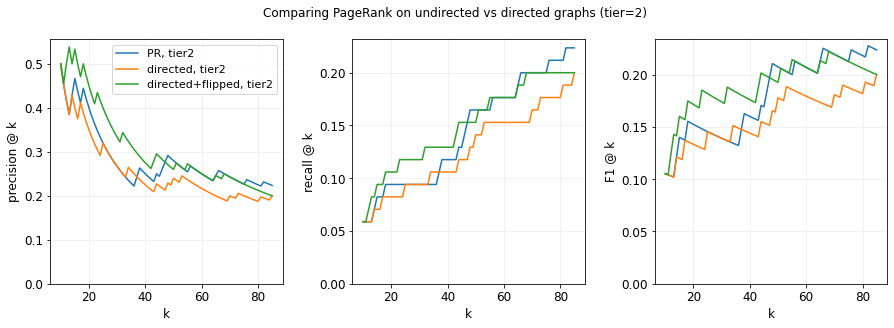

In [7]:
# try directed graph
num_tiers = 2
G_dir = sc.get_supply_chain([BATTERY], tiers=num_tiers, as_nx=True, nx_kwargs={'directed':True})
pr_df_dir = get_pagerank_ordering(G_dir, kwargs=kwargs)
orderings[f'directed, tier{num_tiers}'] = pr_df_dir[(pr_df_dir.node_type == 'PRODUCT') & (pr_df_dir.node_name.isin(products))].node_name.values

G_dir_flip = sc.get_supply_chain([BATTERY], tiers=num_tiers, as_nx=True, nx_kwargs={'directed':True, 'flip_direction':True})
pr_df_dir_flip = get_pagerank_ordering(G_dir_flip, kwargs=kwargs)
orderings[f'directed+flipped, tier{num_tiers}'] = pr_df_dir_flip[(pr_df_dir_flip.node_type == 'PRODUCT') & (pr_df_dir_flip.node_name.isin(products))].node_name.values

labels = [f'PR, tier{num_tiers}', f'directed, tier{num_tiers}', f'directed+flipped, tier{num_tiers}']
compare_orderings_across_k(orderings, labels, title=f'Comparing PageRank on undirected vs directed graphs (tier={num_tiers})')

Found 7146 companies overall, 7146 companies with edges, 3135 products with edges, 96043 edges
Found 7146 companies overall, 7146 companies with edges, 3135 products with edges, 96043 edges


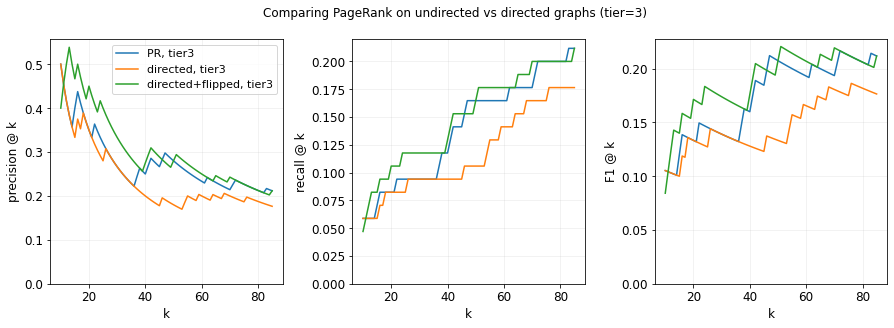

In [8]:
# try directed graph
num_tiers = 3
G_dir = sc.get_supply_chain([BATTERY], tiers=num_tiers, as_nx=True, nx_kwargs={'directed':True})
pr_df_dir = get_pagerank_ordering(G_dir, kwargs=kwargs)
orderings[f'directed, tier{num_tiers}'] = pr_df_dir[(pr_df_dir.node_type == 'PRODUCT') & (pr_df_dir.node_name.isin(products))].node_name.values

G_dir_flip = sc.get_supply_chain([BATTERY], tiers=num_tiers, as_nx=True, nx_kwargs={'directed':True, 'flip_direction':True})
pr_df_dir_flip = get_pagerank_ordering(G_dir_flip, kwargs=kwargs)
orderings[f'directed+flipped, tier{num_tiers}'] = pr_df_dir_flip[(pr_df_dir_flip.node_type == 'PRODUCT') & (pr_df_dir_flip.node_name.isin(products))].node_name.values

labels = [f'PR, tier{num_tiers}', f'directed, tier{num_tiers}', f'directed+flipped, tier{num_tiers}']
compare_orderings_across_k(orderings, labels, title=f'Comparing PageRank on undirected vs directed graphs (tier={num_tiers})')

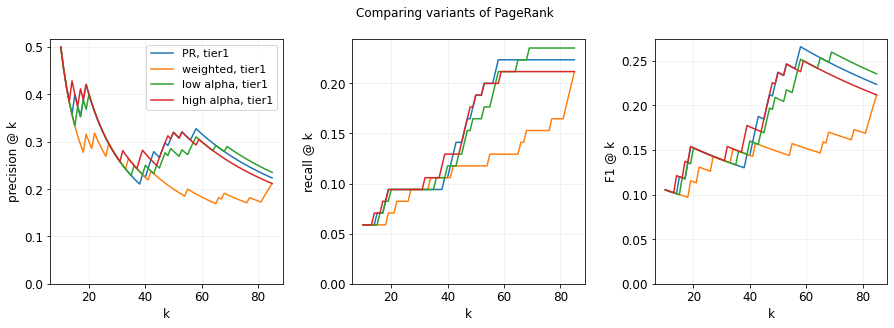

In [9]:
# try variants of PageRank
# weighted PageRank using edge_attr (bill_count) on edges
kwargs = {'personalization': {'%s_PRODUCT' % BATTERY: 1}, 'weight': 'edge_attr'}
pr_df_weighted = get_pagerank_ordering(G1, kwargs=kwargs)
orderings['weighted, tier1'] = pr_df_weighted[(pr_df_weighted.node_type == 'PRODUCT') & (pr_df_weighted.node_name.isin(products))].node_name.values

# lower alpha parameter (shorter random walks)
kwargs = {'personalization': {'%s_PRODUCT' % BATTERY: 1}, 'alpha': 0.7}
pr_df_low_alpha = get_pagerank_ordering(G1, kwargs=kwargs)
orderings['low alpha, tier1'] = pr_df_low_alpha[(pr_df_low_alpha.node_type == 'PRODUCT') & (pr_df_low_alpha.node_name.isin(products))].node_name.values

# higher alpha parameter (longer random walks)
kwargs = {'personalization': {'%s_PRODUCT' % BATTERY: 1}, 'alpha': 0.95}
pr_df_high_alpha = get_pagerank_ordering(G1, kwargs=kwargs)
orderings['high alpha, tier1'] = pr_df_high_alpha[(pr_df_high_alpha.node_type == 'PRODUCT') & (pr_df_high_alpha.node_name.isin(products))].node_name.values

labels = ['PR, tier1', 'weighted, tier1', 'low alpha, tier1', 'high alpha, tier1']
compare_orderings_across_k(orderings, labels, 'Comparing variants of PageRank')

/home/serina/src/sc_experiments.py:207: RuntimeWarning: invalid value encountered in true_divide
  f1_vec = 2 * (prec_vec * rec_vec) / (prec_vec + rec_vec)


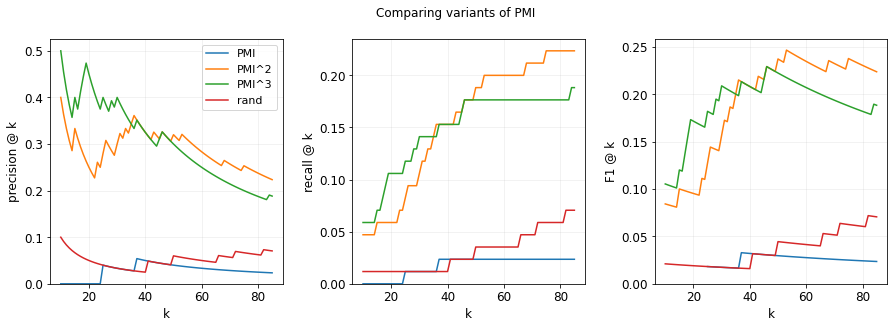

In [10]:
# compare results across PMIs
orderings['PMI'] = pmis[pmis.product_sold == BATTERY].sort_values('pmi', ascending=False).product_bought.values
orderings['PMI^2'] = pmis[pmis.product_sold == BATTERY].sort_values('pmi^2', ascending=False).product_bought.values
orderings['PMI^3'] = pmis[pmis.product_sold == BATTERY].sort_values('pmi^3', ascending=False).product_bought.values

labels = ['PMI', 'PMI^2', 'PMI^3', 'rand']
compare_orderings_across_k(orderings, labels, 'Comparing variants of PMI')

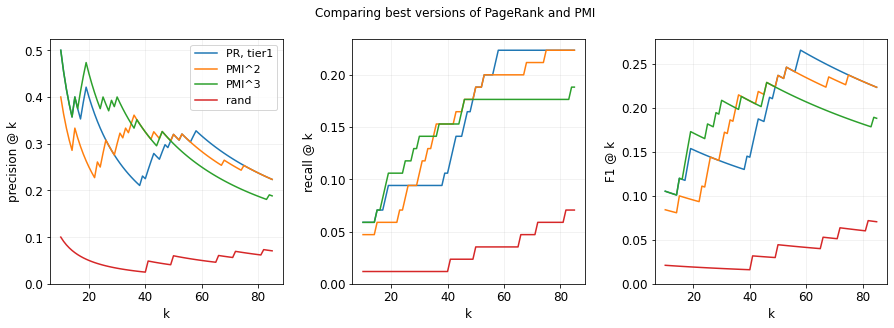

In [11]:
# compare best PageRank and best PMIs
labels = ['PR, tier1', 'PMI^2', 'PMI^3', 'rand']
compare_orderings_across_k(orderings, labels, 'Comparing best versions of PageRank and PMI')

In [12]:
# evaluate similarity in orderings
# spearmans are low, but overlap in top 100 is probably a better metric since we only care about top
from scipy.stats import spearmanr

labels = list(orderings.keys())
for i in range(len(labels)):
    if i < (len(labels)-1):
        for j in range(i+1, len(labels)):
            l_i, l_j = labels[i], labels[j]
            if l_i != 'rand' and l_j != 'rand':
                ord_i = orderings[l_i]
                ord_j = orderings[l_j]
                r, p = spearmanr(ord_i, ord_j)
                overlap = len(set(ord_i[:100]).intersection(set(ord_j[:100])))
                print('%s vs %s -> spearmanr=%.4f (p=%.4f), overlap in top 100: %d' % (
                    l_i, l_j, r, p, overlap))
        print()


PR, tier1 vs PR, tier2 -> spearmanr=0.0890 (p=0.0002), overlap in top 100: 96
PR, tier1 vs PR, tier3 -> spearmanr=0.1192 (p=0.0000), overlap in top 100: 94
PR, tier1 vs directed, tier1 -> spearmanr=0.0967 (p=0.0001), overlap in top 100: 62
PR, tier1 vs directed+flipped, tier1 -> spearmanr=0.0792 (p=0.0010), overlap in top 100: 64
PR, tier1 vs directed, tier2 -> spearmanr=0.1515 (p=0.0000), overlap in top 100: 62
PR, tier1 vs directed+flipped, tier2 -> spearmanr=0.0432 (p=0.0728), overlap in top 100: 65
PR, tier1 vs directed, tier3 -> spearmanr=0.1274 (p=0.0000), overlap in top 100: 61
PR, tier1 vs directed+flipped, tier3 -> spearmanr=0.0873 (p=0.0003), overlap in top 100: 63
PR, tier1 vs weighted, tier1 -> spearmanr=0.0845 (p=0.0004), overlap in top 100: 63
PR, tier1 vs low alpha, tier1 -> spearmanr=0.1353 (p=0.0000), overlap in top 100: 95
PR, tier1 vs high alpha, tier1 -> spearmanr=0.1001 (p=0.0000), overlap in top 100: 95
PR, tier1 vs PMI -> spearmanr=-0.0049 (p=0.8372), overlap in

In [13]:
# top 30 from PageRank, tier1
pr_ordering = pr_df1[(pr_df1.node_type == 'PRODUCT') & (pr_df1.node_name.isin(products))].copy()
print(len(pr_ordering))
pr_ordering['label'] = pr_ordering.node_name.isin(BATTERY_PARTS)
pr_ordering.head(30)

1726


,node_name,node_type,label,pr,rank
1,850760,PRODUCT,True,0.449487,0
34,850440,PRODUCT,True,0.001297,13
21,392690,PRODUCT,True,0.001111,20
175,854442,PRODUCT,True,0.000875,31
169,732690,PRODUCT,True,0.000743,37
224,853690,PRODUCT,False,0.000668,43
220,851762,PRODUCT,False,0.000668,44
287,851770,PRODUCT,False,0.000573,56
239,731815,PRODUCT,False,0.000571,57
37,853650,PRODUCT,False,0.000546,60


In [14]:
# top 30 from PMI
pr_ordering = pmis[pmis.product_sold == BATTERY].sort_values('pmi^2', ascending=False).copy()
print(len(pr_ordering))
pr_ordering['label'] = pr_ordering.product_bought.isin(BATTERY_PARTS)
pr_ordering.head(30)[['product_bought', 'label', 'p_product_bought', 'pmi', 'pmi^2', 'pmi^3']]

1726


,product_bought,label,p_product_bought,pmi,pmi^2,pmi^3
417106,850760,True,0.140082,-1.024663,-6.000003,-10.975344
417160,851770,False,0.009230,0.164193,-6.342022,-12.848238
417167,851829,False,0.005545,0.393519,-6.392999,-13.179517
417013,847330,False,0.009197,0.098804,-6.476404,-13.051613
417283,854231,False,0.007902,0.123799,-6.578161,-13.280121
417090,850440,True,0.023308,-0.441647,-6.627391,-12.813135
417284,854232,False,0.002557,0.637079,-6.680067,-13.997213
417296,854442,True,0.024138,-0.492901,-6.694905,-12.896909
417067,850110,True,0.008832,-0.014825,-6.744185,-13.473544
417193,852580,False,0.007072,0.089596,-6.757547,-13.604689


# Find companies with battery and BMS

In [3]:
# load index
index = pd.read_csv("s3://supply-web-data-storage/CSV/index_hs6.csv")
index.head()

,supplier_t,supplier_id,buyer_t,buyer_id,hs6,st,et,bill_count,quantity_sum,weight_sum,amount_sum
0,NaN,NaN,hitachi rail europe ltd,961db080904f3ba98b0f62302ba82fe8,271019,2022-07-01,2022-07-01,1,0.0,0.0,0.0
1,NaN,NaN,hitachi rail europe ltd,961db080904f3ba98b0f62302ba82fe8,280430,2022-10-01,2022-10-01,1,0.0,0.0,0.0
2,NaN,NaN,hitachi rail europe ltd,961db080904f3ba98b0f62302ba82fe8,281122,2021-12-01,2021-12-01,1,0.0,0.0,0.0
3,NaN,NaN,hitachi rail europe ltd,961db080904f3ba98b0f62302ba82fe8,300660,2022-10-01,2022-10-01,1,0.0,0.0,0.0
4,NaN,NaN,hitachi rail europe ltd,961db080904f3ba98b0f62302ba82fe8,320820,2019-01-01,2020-12-01,8,0.0,0.0,0.0


In [103]:
# load BOM dictionary
bom = parse_battery_bom()
print('num parts', len(bom))
print('BMS codes', bom['BMS'])

num parts 16
BMS codes ['850450', '850730', '850780', '850790', '853222', '853223', '853321', '853340', '853630', '853641', '853890', '854190', '854239', '854290', '854411', '854442', '854449']


In [5]:
# get companies that sell battery and buy BMS
battery_suppliers = index[index.hs6 == BATTERY].groupby('supplier_t')['bill_count'].sum().rename('battery_supply_count')
bms_buyers = index[index.hs6.isin(bom['BMS'])].groupby('buyer_t')['bill_count'].sum().rename('bms_buy_count')
merged = pd.merge(battery_suppliers, bms_buyers, left_index=True, right_index=True, how='inner')  # must have both
merged.sort_values('battery_supply_count', ascending=False).head(30)

,battery_supply_count,bms_buy_count
sevt,2540,15111
sehc,689,107115
"samsung electronics vietnam thai nguyen co.,ltd",658,8
cong ty tnhh dien tu samsung hcmc ce complex,631,270
luxshare precision limited,437,3877
"samsung electronics co., ltd",350,85
samsung electronics vietnam company limited,264,1170
"hansol electronics vietnam co.,ltd",215,2
samsung electronics vietnam thai nguyen company limited,211,342
cong ty tnhh samsung electronics viet nam thai nguyen,146,130


In [8]:
import http.cookiejar as cookielib
import pandas as pd
import requests
import warnings
import logging
import sqlite3
import boto3
import glob
import json
import time
import math
import tqdm
import sys
import os

sys.path.append("/opt/libs")
from apiclass import APIClass,RedshiftClass
from apikeyclass import APIkeyClass
from dotenv import load_dotenv

warnings.filterwarnings('ignore')

rs = RedshiftClass('serina','Serina123')

Successful connection！
 


In [86]:
# get transactions where company is supplying battery
company = 'samsung electronics'
query = f"select * from logistic_data where hs_code like '{BATTERY}%' and supplier_t like '{company}%';"
print(query)
df = rs.query_df(query)
print(len(df), len(df.drop_duplicates()))

# save transactions
df = df.drop_duplicates()
df = df.sort_values('date')
df.to_csv('battery_supplier_%s.csv' % company.replace(' ', '_'), index=False)
df.head()

select * from logistic_data where hs_code like '850760%' and supplier_t like 'samsung electronics%';
35088 3530


,id,date,supplier_t,supplier_id,buyer_t,buyer_id,quantity,quantity_unit,price,amount,...,sub_bill_no,orig_port,dest_port,teu,data_source,trans_type,trans_type_code,vessel_name,supplier_addr,buyer_addr
11618,643121462892638219,2019-01-22,"samsung electronics co.,ltd",c7bc34d9d3bc34b8af6314cc7cee128c,cong ty tnhh samsung electronics việt nam,74b972186d553fc89d835e821645b9f3,25.0,PCE,6.9899,174.748093,...,,INCHEON INTL APT SEO,HA NOI,None,IMP_VIETNAM_CD_CVB,AIR,AIR,,"(MAETAN DONG) 129 SAMSUNG-RO YEONGTONG-GU,","KCN Yên Phong 1-xã Yên Trung,Huyện Yên Phong- ..."
20013,643125064239493136,2019-03-28,"samsung electronics co., ltd",c7bc34d9d3bc34b8af6314cc7cee128c,cong ty tnhh samsung electronics việt nam,74b972186d553fc89d835e821645b9f3,126.0,PCE,2.0000,252.000000,...,,INCHEON INTL APT SEO,HA NOI,None,IMP_VIETNAM_CD_CVB,AIR,AIR,,"(MAETAN DONG) 129 SAMSUNG-RO YEONGTONG-GU, SUW...",
11617,643125077778706458,2019-03-31,"samsung electronics co., ltd",c7bc34d9d3bc34b8af6314cc7cee128c,cong ty tnhh samsung electronics việt nam,74b972186d553fc89d835e821645b9f3,96.0,PCE,2.0000,192.000000,...,,PUSAN,HA NOI,None,IMP_VIETNAM_CD_CVB,AIR,AIR,,"302 3GONGDAN 3-RO, GUMI-SI TAE R.KOREA",
20012,643127601432703012,2019-04-03,"samsung electronics co., ltd",c7bc34d9d3bc34b8af6314cc7cee128c,cong ty tnhh samsung electronics việt nam,74b972186d553fc89d835e821645b9f3,84.0,PCE,1.3000,109.199997,...,,PUSAN,HA NOI,None,IMP_VIETNAM_CD_CVB,AIR,AIR,,"302, 3GONGDAN 3-RO GUMI-SI GYEONGBUK, KOREA R....",
16463,643127622555217947,2019-04-08,"samsung electronics co.,ltd",c7bc34d9d3bc34b8af6314cc7cee128c,cong ty tnhh samsung electronics việt nam,74b972186d553fc89d835e821645b9f3,546.0,PCE,2.0000,1092.000000,...,,INCHEON INTL APT SEO,HA NOI,None,IMP_VIETNAM_CD_CVB,AIR,AIR,,"(MAETAN DONG) 129 SAMSUNG-RO YEONGTONG-GU, SUW...",


In [87]:
# get transactions where company is buying BMS
all_dfs = []
for hs in bom['BMS']:
    query = f"select * from logistic_data where hs_code like '{hs}%' and buyer_t like '{company}%';"
    df = rs.query_df(query)
    if df is not None:
        print(hs, '->', len(df), len(df.drop_duplicates()))
        all_dfs.append(df.drop_duplicates())
    else:
        # no results found for this query
        print(hs, '-> None')
all_dfs = pd.concat(all_dfs)
print(len(all_dfs), len(all_dfs.drop_duplicates()))  # should be the same length

# save transactions
all_dfs = all_dfs.sort_values('date')
all_dfs.to_csv('bms_buyer_%s.csv' % company.replace(' ', '_'), index=False)
all_dfs.head()

850450 -> 559249 39349
850730 -> None
850780 -> 32 18
850790 -> None
853222 -> 10668 672
853223 -> 80 16
853321 -> 940683 57200
853340 -> 27934 2657
853630 -> 5983 434
853641 -> 166 97
853890 -> 2530 624
854190 -> None
854239 -> 669067 48239
854290 -> None
854411 -> 208 167
854442 -> 132208 27906
854449 -> 29672 5756
183135 183135


,id,date,supplier_t,supplier_id,buyer_t,buyer_id,quantity,quantity_unit,price,amount,...,sub_bill_no,orig_port,dest_port,teu,data_source,trans_type,trans_type_code,vessel_name,supplier_addr,buyer_addr
7931,638935162417393710,2019-01-11,samcon,f6929c620f1f338daee5fb15fa335722,"samsung electronics hcmc ce complex co., ltd",611804aff1b1313882cd28672873d5e3,60200.0,PCE,NaN,5862.450195,...,,CENGKARENG SUKARNO HATTA U,HO CHI MINH CITY,None,EXP_INDONESIA_CD_DEF,,UNKNOWN,,,"I-11, D2 ROAD, SAIGON HI-TECH PARK, TANG NHON ..."
20,638935162417393712,2019-01-11,samcon,f6929c620f1f338daee5fb15fa335722,"samsung electronics hcmc ce complex co., ltd",611804aff1b1313882cd28672873d5e3,121600.0,PCE,NaN,5862.450195,...,,CENGKARENG SUKARNO HATTA U,HO CHI MINH CITY,None,EXP_INDONESIA_CD_DEF,,UNKNOWN,,,"I-11, D2 ROAD, SAIGON HI-TECH PARK, TANG NHON ..."
4302,638935188321415171,2019-01-23,samcon,f6929c620f1f338daee5fb15fa335722,"samsung electronics hcmc ce complex co., ltd",611804aff1b1313882cd28672873d5e3,52050.0,PCE,NaN,NaN,...,,CENGKARENG SUKARNO HATTA U,HO CHI MINH CITY,None,EXP_INDONESIA_CD_DEF,,UNKNOWN,,,"I-11, D2 ROAD, SAIGON HI-TECH PARK, TANG NHON ..."
22,638935188325609477,2019-01-23,samcon,f6929c620f1f338daee5fb15fa335722,"samsung electronics hcmc ce complex co., ltd",611804aff1b1313882cd28672873d5e3,157800.0,PCE,NaN,NaN,...,,CENGKARENG SUKARNO HATTA U,HO CHI MINH CITY,None,EXP_INDONESIA_CD_DEF,,UNKNOWN,,,"I-11, D2 ROAD, SAIGON HI-TECH PARK, TANG NHON ..."
7704,638937220545589283,2019-02-12,samcon,f6929c620f1f338daee5fb15fa335722,"samsung electronics hcmc ce complex co., ltd",611804aff1b1313882cd28672873d5e3,35050.0,PCE,NaN,NaN,...,,CENGKARENG SUKARNO HATTA U,HO CHI MINH CITY,None,EXP_INDONESIA_CD_DEF,,UNKNOWN,,,"I-11, D2 ROAD, SAIGON HI-TECH PARK, TANG NHON ..."


In [88]:
company = 'samsung electronics'
supply_df = pd.read_csv('battery_supplier_%s.csv' % company.replace(' ', '_'))
buy_df = pd.read_csv('bms_buyer_%s.csv' % company.replace(' ', '_'))
print(len(supply_df), len(buy_df))

# convert date to datetime
supply_df['datetime'] = pd.to_datetime(supply_df.date)
buy_df['datetime'] = pd.to_datetime(buy_df.date)

# extract month from date string
supply_df['month'] = supply_df.date.apply(lambda x: x.rsplit('-', 1)[0])
buy_df['month'] = buy_df.date.apply(lambda x: x.rsplit('-', 1)[0])

# convert month to datetime
supply_df['month_datetime'] = pd.to_datetime(supply_df.month)
buy_df['month_datetime'] = pd.to_datetime(buy_df.month)

supply_df.head()[['date', 'datetime', 'month', 'month_datetime']]

3530 183135


,date,datetime,month,month_datetime
0,2019-01-22,2019-01-22,2019-01,2019-01-01
1,2019-03-28,2019-03-28,2019-03,2019-03-01
2,2019-03-31,2019-03-31,2019-03,2019-03-01
3,2019-04-03,2019-04-03,2019-04,2019-04-01
4,2019-04-08,2019-04-08,2019-04,2019-04-01


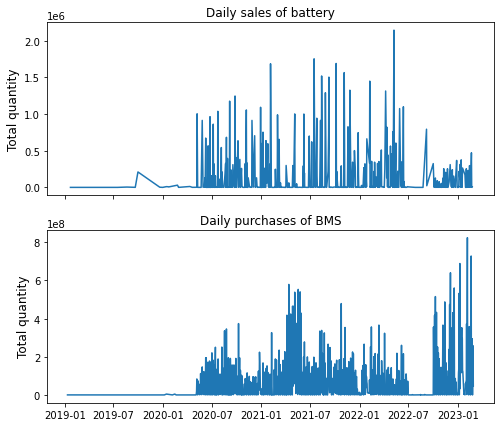

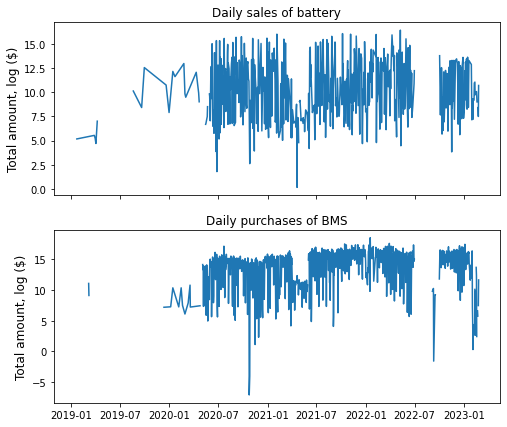

In [89]:
# plot daily sales vs daily purchases
supply_summary = supply_df.groupby('datetime')[['quantity', 'amount']].sum()
buy_summary = buy_df.groupby('datetime')[['quantity', 'amount']].sum()

# plot quantity
fig, axes = plt.subplots(2, 1, figsize=(8, 7), sharex=True)
ax = axes[0]           
ax.set_title('Daily sales of battery', fontsize=12)
ax.plot(supply_summary.index, supply_summary.quantity.values)
ax.set_ylabel('Total quantity', fontsize=12)
ax = axes[1]
ax.set_title('Daily purchases of BMS', fontsize=12)
ax.plot(buy_summary.index, buy_summary.quantity.values)
ax.set_ylabel('Total quantity', fontsize=12)
plt.show()

# plot amount
fig, axes = plt.subplots(2, 1, figsize=(8, 7), sharex=True)
ax = axes[0]           
ax.set_title('Daily sales of battery', fontsize=12)
ax.plot(supply_summary.index, np.log(supply_summary.amount.values))
ax.set_ylabel('Total amount, log ($)', fontsize=12)
ax = axes[1]
ax.set_title('Daily purchases of BMS', fontsize=12)
ax.plot(buy_summary.index, np.log(buy_summary.amount.values))
ax.set_ylabel('Total amount, log ($)', fontsize=12)
plt.show()

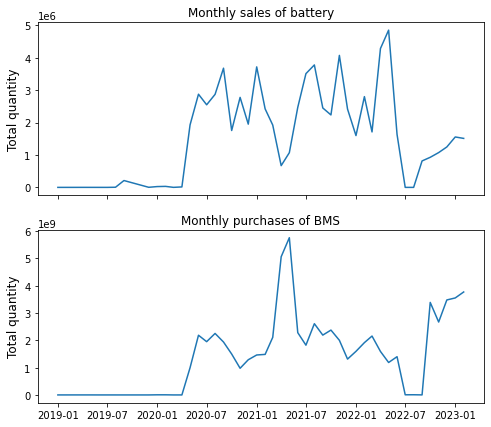

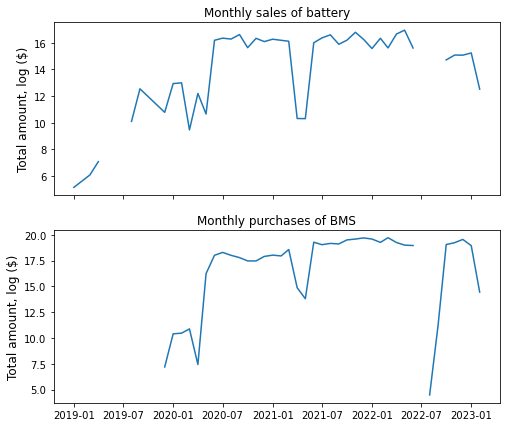

In [90]:
# plot monthly sales vs monthly purchases
supply_summary = supply_df.groupby('month_datetime')[['quantity', 'amount']].sum()
buy_summary = buy_df.groupby('month_datetime')[['quantity', 'amount']].sum()

# plot quantity
fig, axes = plt.subplots(2, 1, figsize=(8, 7), sharex=True)
ax = axes[0]           
ax.set_title('Monthly sales of battery', fontsize=12)
ax.plot(supply_summary.index, supply_summary.quantity.values)
ax.set_ylabel('Total quantity', fontsize=12)
ax = axes[1]
ax.set_title('Monthly purchases of BMS', fontsize=12)
ax.plot(buy_summary.index, buy_summary.quantity.values)
ax.set_ylabel('Total quantity', fontsize=12)
plt.show()

# plot amount
fig, axes = plt.subplots(2, 1, figsize=(8, 7), sharex=True)
ax = axes[0]           
ax.set_title('Monthly sales of battery', fontsize=12)
ax.plot(supply_summary.index, np.log(supply_summary.amount.values))
ax.set_ylabel('Total amount, log ($)', fontsize=12)
ax = axes[1]
ax.set_title('Monthly purchases of BMS', fontsize=12)
ax.plot(buy_summary.index, np.log(buy_summary.amount.values))
ax.set_ylabel('Total amount, log ($)', fontsize=12)
plt.show()

850450 39349 r=0.058 (n=37, p=0.735)
850730 0
850780 18
850790 0
853222 672
853223 16
853321 57200 r=-0.523 (n=31, p=0.003)
853340 2657 r=0.330 (n=42, p=0.033)
853630 434
853641 97
853890 624
854190 0
854239 48239 r=0.097 (n=36, p=0.574)
854290 0
854411 167
854442 27906 r=0.545 (n=36, p=0.001)
854449 5756 r=0.189 (n=34, p=0.285)


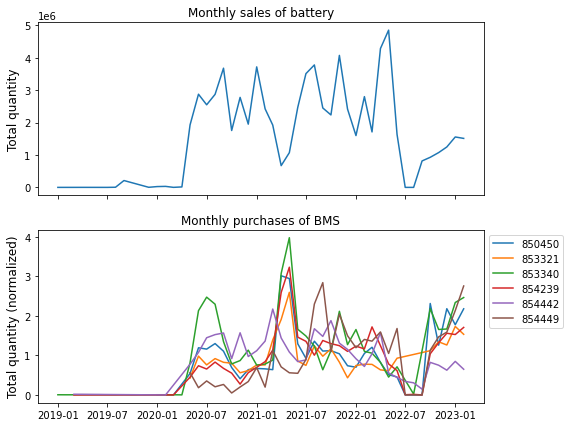

In [101]:
# compare monthly quantity per BMS HS code
supply_summary = supply_df.groupby('month_datetime').quantity.sum()
buy_df['hs_code_str'] = buy_df.hs_code.astype(str)  # convert HS code to str

fig, axes = plt.subplots(2, 1, figsize=(8, 7), sharex=True)
ax = axes[0]           
ax.set_title('Monthly sales of battery', fontsize=12)
ax.plot(supply_summary.index, supply_summary.values)
ax.set_ylabel('Total quantity', fontsize=12)
ax = axes[1]
ax.set_title('Monthly purchases of BMS', fontsize=12)
for hs in bom['BMS']:
    sub_buy_df = buy_df[buy_df.hs_code_str.str.contains(hs)]
    if len(sub_buy_df) > 1000:
        buy_summary = sub_buy_df.groupby('month_datetime').quantity.sum()
        # merge to find common months
        merged = pd.merge(supply_summary.rename('x'), buy_summary.rename('y'), 
                          left_index=True, right_index=True, how='inner')
        r, p = pearsonr(merged.x, merged.y)
        print(hs, len(sub_buy_df), 'r=%.3f (n=%d, p=%.3f)' % (r, len(merged), p))
        # normalize by mean to make comparison easier
        ax.plot(buy_summary.index, buy_summary.values / np.mean(buy_summary.values), label=hs)
    else:
        print(hs, len(sub_buy_df))
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel('Total quantity (normalized)', fontsize=12)
plt.show()